In [48]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
# warnings.filterwarnings('ignore')

In [56]:
D, D_r = 3, 4096
p = 100.
G = int(D_r * p / 100.)
L = int((D_r - G)*0.)
E = D_r - (G + L)
if G == D_r:
    name = 'good'
elif E == 0:
    name = 'linear'
else:
    name = 'extreme'
save_folder = f'../data/of/{D_r}_full_g'
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 4e-5
L0, L1 = 0.4, 3.5
percents = 50
n_repeats = 500
n_models = percents * n_repeats
row_selection = 'good_50_50'
train_option = 'random_110'
N_ = round(0.5*1./(0.91*0.02))
repo = '..'
L63_data_folder = '{}/data/L63-trajectories'.format(repo)
train = np.load('{}/train.npy'.format(L63_data_folder))
test = np.load('{}/test.npy'.format(L63_data_folder))[:, :1000, :]
limits_W_in, limits_W = [-0.1, 0.1], [-.5, .5]

batch = sr1.BatchStrategy_SMLR(save_folder, D, D_r, n_repeats, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1, percents,\
                          row_selection, train_option, limits_W_in, limits_W)
batch.run_single_partition([G, L, E], batch_size=10, length=100, save_data=True)
bsa = sr1.BatchStrategyAnalyzer_SMLR(batch.save_folder)
bsa.compute_train_loss(train, length=N_, penalty=False)
bsa.compute_test_loss_single(test, penalty=False)

Working on batch 0 ...
Time taken by sample_parallel is 1.0387 seconds
Running experiments ...
Time taken by compute_error is 0.0576 seconds
Time taken by compute_train_error is 0.0101 seconds


/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Time taken by compute_error is 0.0560 seconds
Time taken by compute_train_error is 0.0077 seconds
Time taken by compute_error is 0.0563 seconds
Time taken by compute_train_error is 0.0151 seconds
Time taken by compute_error is 0.0397 seconds
Time taken by compute_train_error is 0.0044 seconds
Time taken by compute_error is 0.0527 seconds
Time taken by compute_train_error is 0.0119 seconds
Time taken by compute_error is 0.0695 seconds
Time taken by compute_train_error is 0.0052 seconds
Time taken by compute_error is 0.0730 seconds
Time taken by compute_train_error is 0.0054 seconds
Time taken by compute_error is 0.0354 seconds
Time taken by compute_train_error is 0.0045 seconds
Documenting results ...
Working on batch 1 ...
Time taken by sample_parallel is 0.8387 seconds
Running experiments ...
Time taken by compute_error is 0.0525 seconds
Time taken by compute_train_error is 0.0030 seconds
Time taken by compute_error is 0.0410 seconds
Time taken by compute_train_error is 0.0056 seconds

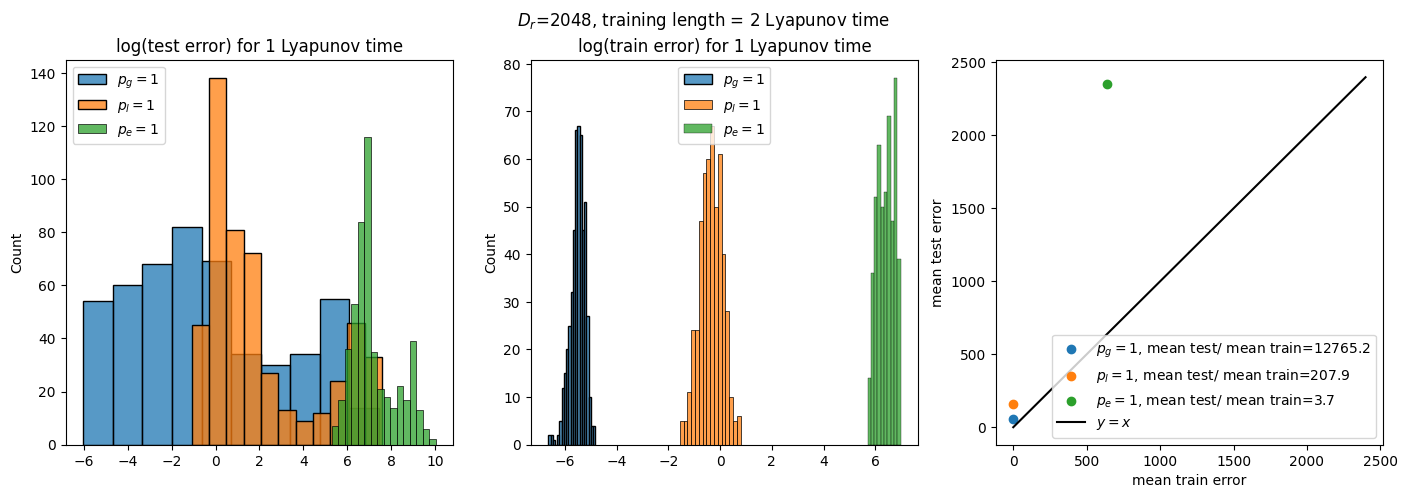

In [44]:
D_r = 2048
bsa_g = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_g')
bsa_l = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_l')
bsa_e = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_e')

data_g = bsa_g.get_data()
data_l = bsa_l.get_data()
data_e = bsa_e.get_data()

fig = plt.figure(figsize=(17, 5))
ax_1 = fig.add_subplot(131)
ax_2 = fig.add_subplot(132)
ax_3 = fig.add_subplot(133)


y = data_g['test_loss_one_single'].to_numpy()
x = data_g['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_g=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_g=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_g=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

y = data_l['test_loss_one_single'].to_numpy()
x = data_l['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_l=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_l=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_l=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

y = data_e['test_loss_one_single'].to_numpy()
x = data_e['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_e=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_e=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_e=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

ax_1.set_title('log(test error) for 1 Lyapunov time')
ax_2.set_title('log(train error) for 1 Lyapunov time')
# ax_3.set_title('ratio of mean errors')
ax_3.plot(np.arange(0., 2400, 1), np.arange(0., 2400, 1), label=r'$y=x$', c='black')
ax_1.legend()
ax_2.legend()
ax_3.legend()

ax_3.set_xlabel('mean train error')
ax_3.set_ylabel('mean test error')

fig.suptitle(fr'$D_r$={D_r}, training length = 2 Lyapunov time')
plt.savefig('../data/of/small_N_errors.png', bbox_inches='tight', dpi=300)

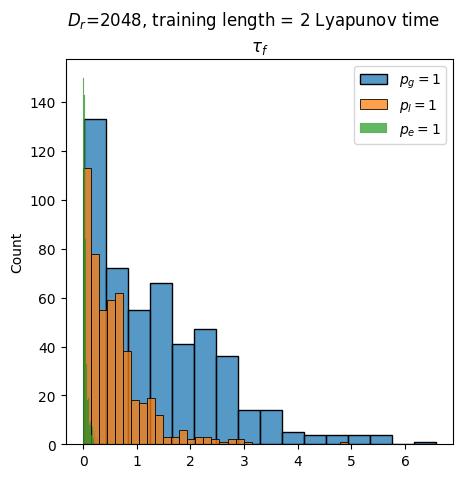

In [36]:
fig = plt.figure(figsize=(5, 5))
ax_1 = fig.add_subplot(111)
# ax_2 = fig.add_subplot(132)
# ax_3 = fig.add_subplot(133)


y = data_g['tau_f_se'].to_numpy()
x = data_g['train_loss'].to_numpy()
sns.histplot((y), ax=ax_1, label='$p_g=1$')
# sns.histplot((x), ax=ax_2, label='$p_g=1$')
# ax_3.scatter(x.mean(), y.mean(), label='$p_g=1$')

y = data_l['tau_f_se'].to_numpy()
x = data_l['train_loss'].to_numpy()
sns.histplot((y), ax=ax_1, label='$p_l=1$')
# sns.histplot((x), ax=ax_2, label='$p_l=1$')
# ax_3.scatter(x.mean(), y.mean(), label='$p_l=1$')

y = data_e['tau_f_se'].to_numpy()
x = data_e['train_loss'].to_numpy()
sns.histplot((y), ax=ax_1, label='$p_e=1$')
# sns.histplot((x), ax=ax_2, label='$p_e=1$')
# ax_3.scatter(x.mean(), y.mean(), label='$p_e=1$')

ax_1.set_title(r'$\tau_f$')
# ax_2.set_title('log(train error) for 1 Lyapunov time')
# ax_3.set_title('ratio of mean errors')
# ax_3.plot(np.arange(0., 2400, 1), np.arange(0., 2400, 1), label=r'$y=x$', c='black')
ax_1.legend()
# ax_2.legend()
# ax_3.legend()

# ax_3.set_xlabel('mean train error')
# ax_3.set_ylabel('mean test error')

fig.suptitle(fr'$D_r$={D_r}, training length = 2 Lyapunov time')
plt.savefig('../data/of/small_N_tau_f.png', bbox_inches='tight', dpi=300)

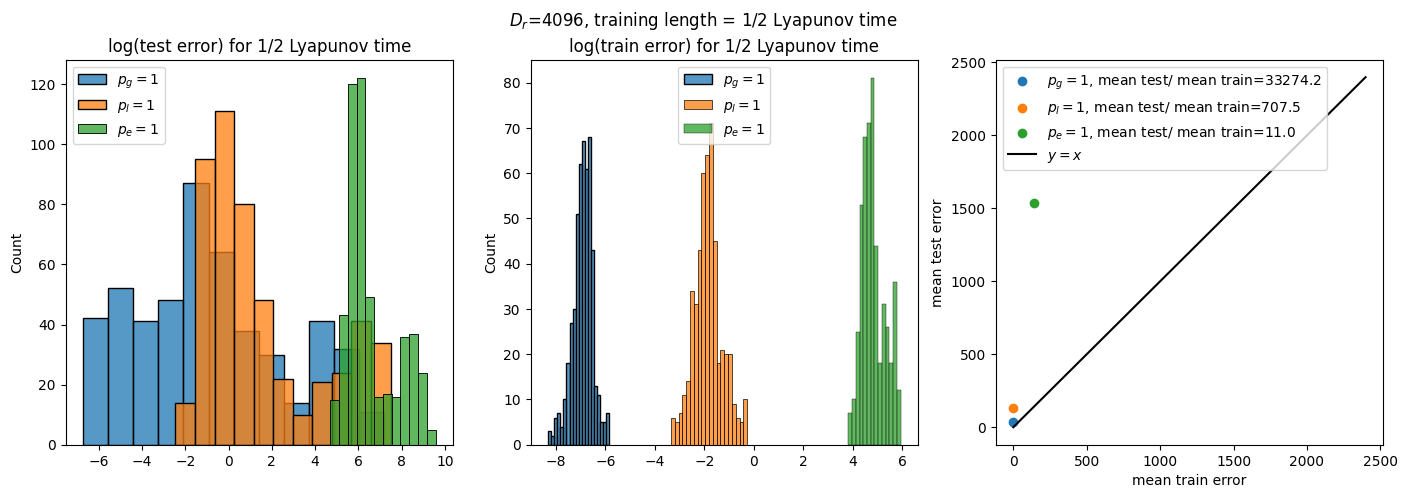

Time taken by compute_error is 0.0441 seconds
Time taken by compute_train_error is 0.0044 seconds
Time taken by compute_error is 0.0494 seconds
Time taken by compute_train_error is 0.0046 seconds
Time taken by compute_error is 0.0481 seconds
Time taken by compute_train_error is 0.0052 seconds
Time taken by compute_error is 0.0577 seconds
Time taken by compute_train_error is 0.0110 seconds
Time taken by compute_error is 0.0335 seconds
Time taken by compute_train_error is 0.0041 seconds
Time taken by compute_error is 0.0612 seconds
Time taken by compute_train_error is 0.0048 seconds
Time taken by compute_error is 0.0533 seconds
Time taken by compute_train_error is 0.0045 seconds
Time taken by compute_error is 0.0692 seconds
Time taken by compute_train_error is 0.0046 seconds
Time taken by compute_error is 0.0554 seconds
Time taken by compute_train_error is 0.0046 seconds
Time taken by compute_error is 0.0549 seconds
Time taken by compute_train_error is 0.0081 seconds
Time taken by comput

In [57]:
D_r = 4096
bsa_g = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_g')
bsa_l = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_l')
bsa_e = sr1.BatchStrategyAnalyzer_SMLR(f'../data/of/{D_r}_full_e')

data_g = bsa_g.get_data()
data_l = bsa_l.get_data()
data_e = bsa_e.get_data()

fig = plt.figure(figsize=(17, 5))
ax_1 = fig.add_subplot(131)
ax_2 = fig.add_subplot(132)
ax_3 = fig.add_subplot(133)


y = data_g['test_loss_one_single'].to_numpy()
x = data_g['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_g=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_g=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_g=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

y = data_l['test_loss_one_single'].to_numpy()
x = data_l['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_l=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_l=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_l=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

y = data_e['test_loss_one_single'].to_numpy()
x = data_e['train_loss'].to_numpy()
sns.histplot(np.log(y), ax=ax_1, label='$p_e=1$')
sns.histplot(np.log(x), ax=ax_2, label='$p_e=1$')
ax_3.scatter(x.mean(), y.mean(), label='$p_e=1$, mean test/ mean train={:.1f}'.format(y.mean()/x.mean()))

ax_1.set_title('log(test error) for 1/2 Lyapunov time')
ax_2.set_title('log(train error) for 1/2 Lyapunov time')
# ax_3.set_title('ratio of mean errors')
ax_3.plot(np.arange(0., 2400, 1), np.arange(0., 2400, 1), label=r'$y=x$', c='black')
ax_1.legend()
ax_2.legend()
ax_3.legend()

ax_3.set_xlabel('mean train error')
ax_3.set_ylabel('mean test error')

fig.suptitle(fr'$D_r$={D_r}, training length = 1/2 Lyapunov time')
plt.savefig('../data/of/small_N_errors_4096.png', bbox_inches='tight', dpi=300)